# business understanding

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sms
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import copy

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Einlesen der csv-Datei

immo = pd.read_csv("King_County_House_prices_dataset.csv")


In [4]:
immo.shape

(21597, 21)

### Check columns / Definition

- **ID** - Identifier 
- **date** - Date
- **price** - Price of the house
- **bedrooms** / **bathrooms** / **floors** - Number of bed- or bathrooms and floors
- **waterfront** - flag if an objected is located close to the waterfront
   0 = not at the waterfront; 1 = at the waterfront
- **view** - identicator how often an object is viewed    
- **condition** -  condition of an object
- **grade** - grade of an object due to a local estate agents rating system
- **sqft_above / sqft_basement** - number of sqft for basement and the remaining floors
- **zipcode** -  zipcode of an object
- **lat / long** -  coordinates of an object
- **sqft_livingneigh / sqft_lotneigh** - indication of distance to the neighbour house

In [5]:
# types of columns
immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  int64  
 1   date              21597 non-null  object 
 2   price             21597 non-null  float64
 3   bedrooms          21597 non-null  int64  
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  int64  
 6   sqft_lot          21597 non-null  int64  
 7   floors            21597 non-null  float64
 8   waterfront        19221 non-null  float64
 9   view              21534 non-null  float64
 10  condition         21597 non-null  int64  
 11  grade             21597 non-null  int64  
 12  sqft_above        21597 non-null  int64  
 13  sqft_basement     21597 non-null  object 
 14  yr_built          21597 non-null  int64  
 15  yr_renovated      17755 non-null  float64
 16  zipcode           21597 non-null  int64 

In [6]:
# Analysis of the most important figures via describe()

immo.describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.00,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.370000e+00,9.300000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.120000e+00,7.700000e-01,0.50,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080320e+03,9.181100e+02,370.00,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.00,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Check for duplicates

In [7]:
# generate count statistics of duplicate entries
if len(immo[immo.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(immo[immo.duplicated()]))
    print(immo[immo.duplicated(keep=False)].sort_values(by=list(immo.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


### Check distribution

In [8]:
# Look at data skew; the skewness of values along an axis, returning 0 where all values are equal or if they follow 
# a normal distribution
immo.skew()

id                   0.243226
price                4.023365
bedrooms             2.023641
bathrooms            0.519709
sqft_living          1.473215
sqft_lot            13.072604
floors               0.614497
waterfront          11.343651
view                 3.399526
condition            1.036037
grade                0.788237
sqft_above           1.447434
yr_built            -0.469450
yr_renovated         4.573385
zipcode              0.405322
lat                 -0.485522
long                 0.884888
sqft_livingneigh     1.106875
sqft_lotneigh        9.524362
dtype: float64

In [9]:
# Number of unique values for each column, sorted by count
immo.T.apply(lambda x: x.nunique(), axis=1).sort_values(ascending=False)

id                  21420
sqft_lot             9776
sqft_lotneigh        8682
lat                  5033
price                3622
sqft_living          1034
sqft_above            942
sqft_livingneigh      777
long                  751
date                  372
sqft_basement         304
yr_built              116
yr_renovated           70
zipcode                70
bathrooms              29
bedrooms               12
grade                  11
floors                  6
condition               5
view                    5
waterfront              2
dtype: int64

### Check target

### First Conclusions

In [10]:
#First we create a new DataFrame with only numerical features
numerics = ['int64', 'float64']

In [11]:
num_df = immo.iloc[:,2:21]

In [12]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  float64
 1   bedrooms          21597 non-null  int64  
 2   bathrooms         21597 non-null  float64
 3   sqft_living       21597 non-null  int64  
 4   sqft_lot          21597 non-null  int64  
 5   floors            21597 non-null  float64
 6   waterfront        19221 non-null  float64
 7   view              21534 non-null  float64
 8   condition         21597 non-null  int64  
 9   grade             21597 non-null  int64  
 10  sqft_above        21597 non-null  int64  
 11  sqft_basement     21597 non-null  object 
 12  yr_built          21597 non-null  int64  
 13  yr_renovated      17755 non-null  float64
 14  zipcode           21597 non-null  int64  
 15  lat               21597 non-null  float64
 16  long              21597 non-null  float6

In [ ]:
#Korrelationsanalyse
corr = num_df
plt.figure(figsize=(13,10))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)
plt.savefig('correlogram_simple.png')
plt.show

# data cleaning

### change datatypes

#### date

In [14]:
# column date
immo.date=pd.to_datetime(immo.date)

In [15]:
# additional columns from date column 

immo['month']=immo['date'].dt.month
immo['year']=immo['date'].dt.year
immo['weekday']=immo['date'].dt.weekday

#### sqft_basement

In [16]:
# column sqft_basement can be computated via sqft_living and sqft_above

immo["sqft_basement"]=immo["sqft_living"]-immo["sqft_above"]

### null value handling

#### checking null values

In [17]:
# checking null values
nan = pd.DataFrame(immo.isnull().sum(),columns=['Count'])
nan['Percentage'] = round(nan.Count/immo.shape[0]*100,1)
print(nan[nan.Count!=0])

              Count  Percentage
waterfront     2376        11.0
view             63         0.3
yr_renovated   3842        17.8


#### replace null values

In [18]:
# column waterfront
immo.waterfront.fillna(0,inplace=True)

In [19]:
# column view
immo.view.fillna(0,inplace=True)

In [20]:
# column view
immo.yr_renovated.fillna(0,inplace=True)

In [21]:
# checking null values again
nan = pd.DataFrame(immo.isnull().sum(),columns=['Count'])
nan['Percentage'] = round(nan.Count/immo.shape[0]*100,1)
print(nan[nan.Count!=0])

Empty DataFrame
Columns: [Count, Percentage]
Index: []


### Outlier handling

**Conclusions**
- `When you consider the result of immo.describe the following columns are candidates for outlier occurence. See new dataframe outliers.`
- `I decide to only consider all values up to the 0.99-percentiles for the columns price, bedrooms and bathrooms.`

In [22]:
outliers=immo[['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_basement','sqft_livingneigh','sqft_lotneigh']]


In [23]:
# check for outliners for all or a set of features df[[]]
outliers = pd.DataFrame(round(outliers.describe(percentiles=[0.9,0.95, 0.99]),1))
outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,sqft_livingneigh,sqft_lotneigh
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,540296.6,3.4,2.1,2080.3,15099.4,291.7,1986.6,12758.3
std,367368.1,0.9,0.8,918.1,41412.6,442.7,685.2,27274.4
min,78000.0,1.0,0.5,370.0,520.0,0.0,399.0,651.0
50%,450000.0,3.0,2.2,1910.0,7618.0,0.0,1840.0,7620.0
90%,887000.0,4.0,3.0,3254.0,21371.6,970.0,2930.0,17822.0
95%,1160000.0,5.0,3.5,3760.0,43307.2,1190.0,3300.0,37045.2
99%,1970000.0,6.0,4.2,4980.0,213008.0,1660.0,4080.0,157687.0
max,7700000.0,33.0,8.0,13540.0,1651359.0,4820.0,6210.0,871200.0


#### price


In [24]:
# price
immo=immo[immo.price<2000000]

#### bedrooms

In [25]:
# bedrooms, one object with 33 bedrooms
immo=immo[immo.bedrooms<=6]

#### bathrooms

In [26]:
# bedrooms, one object with 33 bedrooms
immo=immo[immo.bedrooms<=6]

# Data Analysis

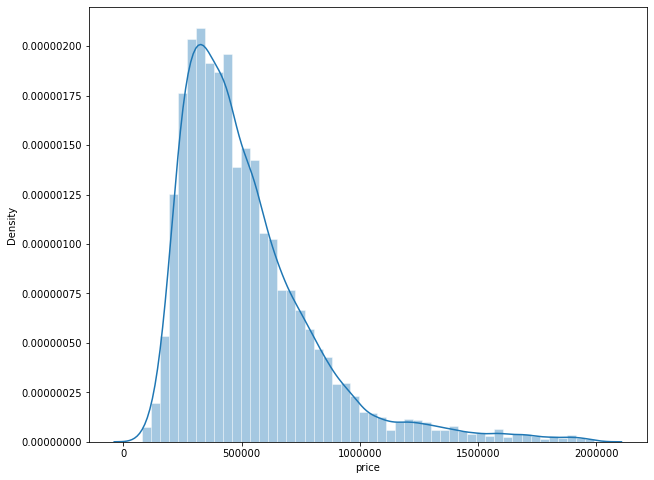

In [93]:
# Plot home price distribution

plt.figure(figsize=(10, 8))
sns.distplot(immo['price'], bins=50, hist_kws=dict(edgecolor="white", linewidth=1))

plt.ticklabel_format(style='plain')

In [41]:
# new column log_price to as approach to a normal distribution

immo["price_log"]=np.log(immo.price)

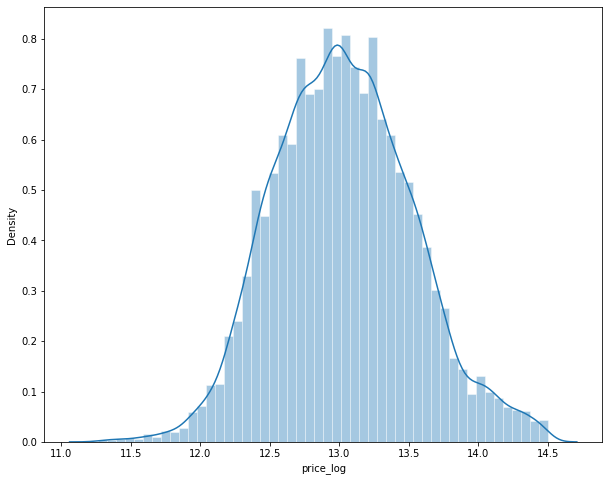

In [95]:
# Plot transformed home price distribution

plt.figure(figsize=(10, 8))
sns.distplot(immo['price_log'], bins=50, hist_kws=dict(edgecolor="white", linewidth=1))

plt.ticklabel_format(style='plain')

In [96]:
# new distribution close to normal
immo["price_log"].skew()

0.17403022703246807

## Analysis of Column sqft_living



**Conclusions**
- `The information given by feature sqft_above is redundant, so it don't has to be dicussed here.`

In [104]:
# Definition of size bins
size_bins = np.arange(0, 10000,1000)
size_series = pd.cut(immo['sqft_living'], bins=size_bins, 
                              labels=size_bins[:-1])
size_series.name = 'size_bin'
immo_df = pd.concat([immo, size_series], axis=1)

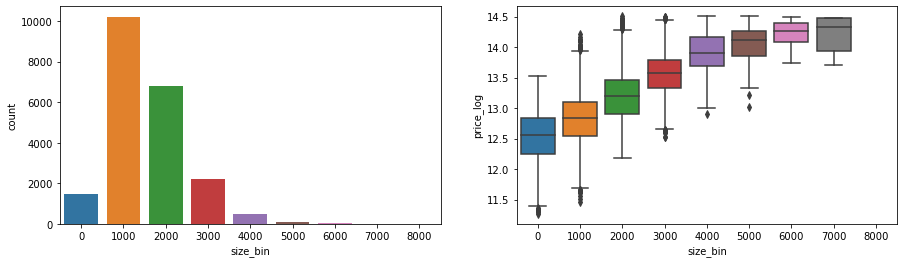

In [105]:
# Visualization of the distribution and the price distribution related to the featurebins
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='size_bin',data=immo_df,ax=ax[0])
sns.boxplot(x='size_bin', y='price_log', data=immo_df,ax=ax[1])
plt.show()

## Analysis of column sqft_basement

In [108]:
# Definition of size bins
size_bins_2 = np.arange(0, 3000,500)
size_series_2 = pd.cut(immo['sqft_basement'], bins=size_bins_2, 
                              labels=size_bins_2[:-1])
size_series_2.name = 'size_bin_2'

In [109]:
immo_df_2 = pd.concat([immo, size_series_2], axis=1)

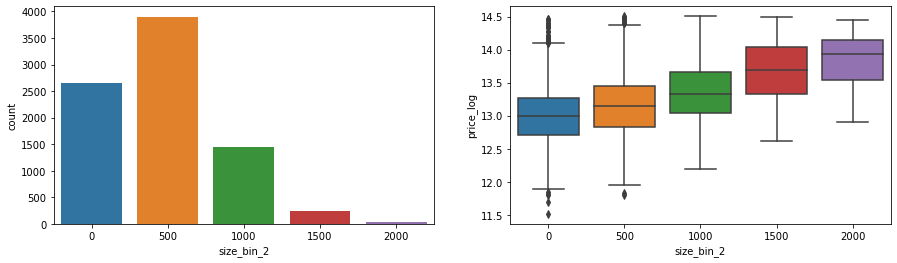

In [110]:
# Visualization of the distribution and the price distribution related to the featurebins
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='size_bin_2',data=immo_df_2,ax=ax[0])
sns.boxplot(x='size_bin_2', y='price_log', data=immo_df_2,ax=ax[1])
plt.show()

## Analysis of Column sqft_lot


**Conclusions**
- `There is no significant causal relationship between the column sqft_lot and the transformed price.`
- `The feature don't need to be considered later on.`

In [112]:
# Definition of size bins
size_bins_3 = np.arange(0, 3000,500)
size_series_3 = pd.cut(immo['sqft_lot'], bins=size_bins_3, 
                              labels=size_bins_3[:-1])
size_series_3.name = 'size_bin_3'

immo_df_3 = pd.concat([immo, size_series_3], axis=1)

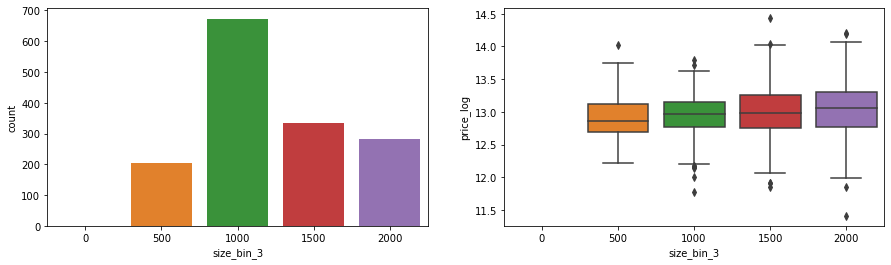

In [113]:
# Visualization of the distribution and the price distribution related to the featurebins
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='size_bin_3',data=immo_df_3,ax=ax[0])
sns.boxplot(x='size_bin_3', y='price_log', data=immo_df_3,ax=ax[1])
plt.show()

## Analysis of Column bathroom

**Conclusions**
- `There is a significant causal relationship between the column bathroom and the transformed price.`
- `The price decreases with the increasing size of bathrooms, but the effect becomes smaller.`
- `The feature should be considered later on.`

In [43]:
immo['bathrooms'].round(0).value_counts()

2.0    13847
1.0     3931
3.0     2527
4.0     1201
5.0       57
6.0       24
8.0        4
0.0        4
7.0        2
Name: bathrooms, dtype: int64

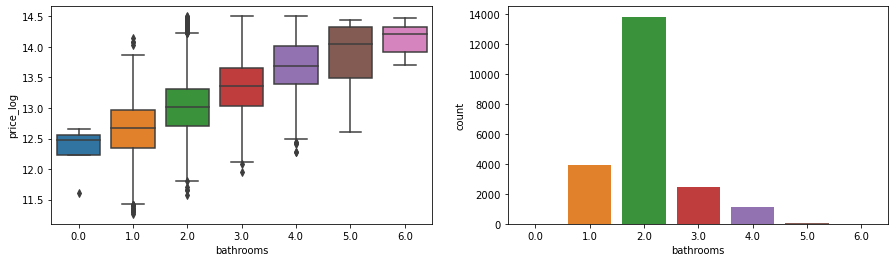

In [114]:
immo['bathrooms']=immo['bathrooms'].round(0)
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='bathrooms',data=immo,ax=ax[1])
sns.boxplot(x='bathrooms', y='price_log', data=immo,ax=ax[0])
plt.show()

## Analysis of Column bedrooms



**Conclusions**
- `There is a significant causal relationship between the column bedrooms and the transformed price.`
- `The price decreases with the increasing size of bedrooms, but the effect becomes smaller.`
- `The feature should be considered later on.`

In [46]:
immo['bedrooms'].round(0).value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

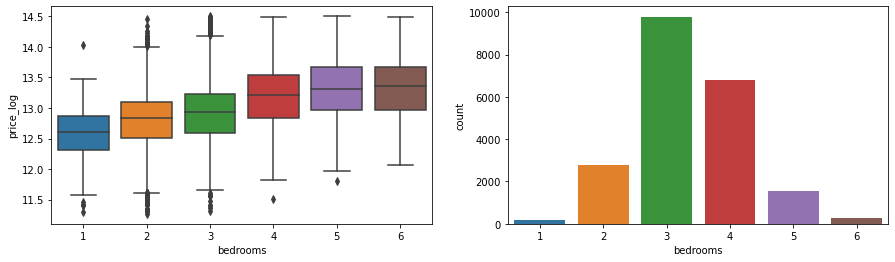

In [115]:
immo['bedrooms']=immo['bedrooms'].round(0)
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='bedrooms',data=immo,ax=ax[1])
sns.boxplot(x='bedrooms', y='price_log', data=immo,ax=ax[0])
plt.show()

## Analysis of Column floor

**Conclusions**
- `There is no significant causal relationship between the column floor and the transformed price.`
- `The feature don't need to be considered later on.`

In [49]:
immo['floors'].round(0).value_counts()

1.0    10673
2.0    10306
3.0      611
4.0        7
Name: floors, dtype: int64

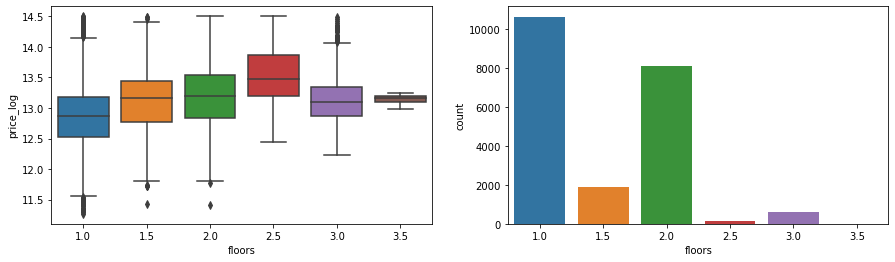

In [116]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='floors',data=immo,ax=ax[1])
sns.boxplot(x='floors', y='price_log', data=immo,ax=ax[0])
plt.show()

## Analysis of Column view


In [51]:
immo['view'].round(0).value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

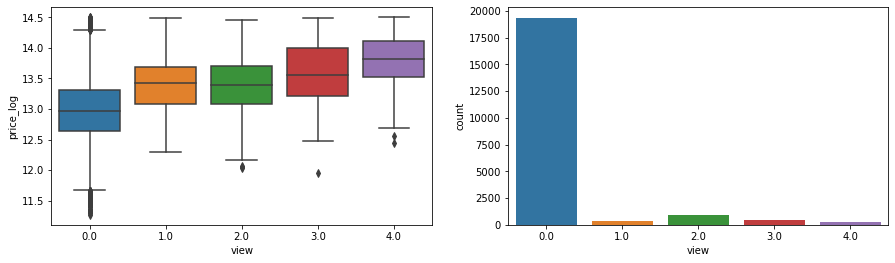

In [117]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='view',data=immo,ax=ax[1])
sns.boxplot(x='view', y='price_log', data=immo,ax=ax[0])
plt.show()

## Analysis of Column condition


In [54]:
immo['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

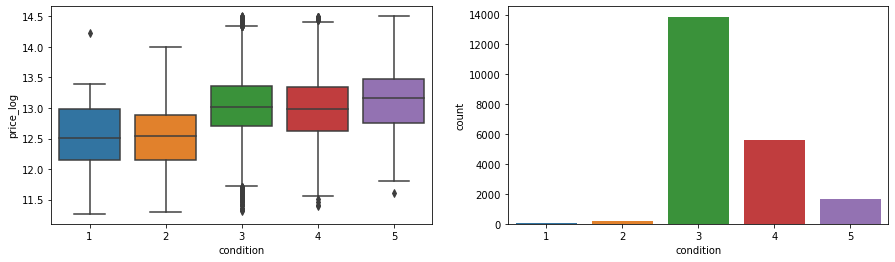

In [118]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='condition',data=immo,ax=ax[1])
sns.boxplot(x='condition', y='price_log', data=immo,ax=ax[0])
plt.show()

## Analysis of Column grade


In [57]:
immo.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

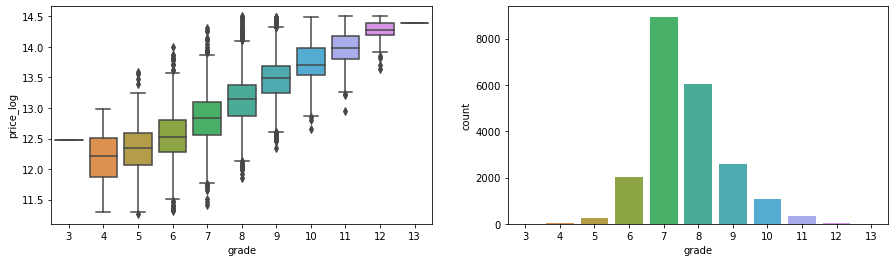

In [119]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='grade',data=immo,ax=ax[1])
sns.boxplot(x='grade', y='price_log', data=immo,ax=ax[0])
plt.show()

## Analysis of column yr_built


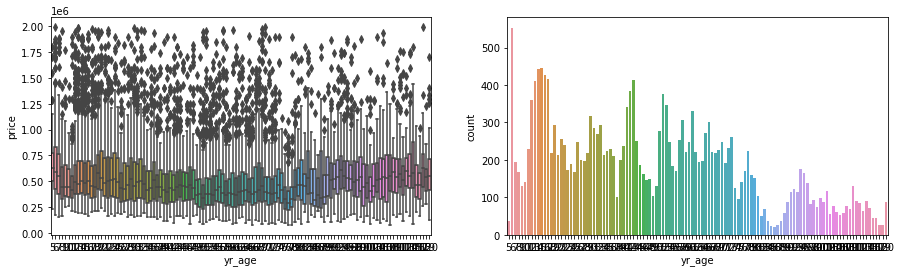

In [120]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='yr_age',data=immo,ax=ax[1])
sns.boxplot(x='yr_age', y='price', data=immo,ax=ax[0])
plt.show()

In [122]:
immo['yr_built_cat']=immo['yr_age'].apply(lambda x: 'old' if x >=50 else '50' if x >=40 else '40' 
                                          if x>=30 else '30' if x >=20 else 'new')



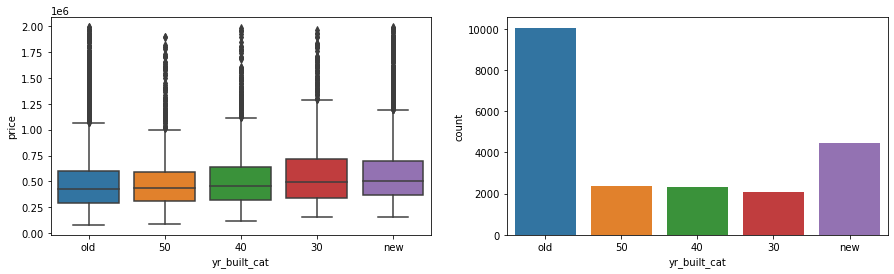

In [123]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='yr_built_cat',data=immo,order=['old','50','40','30','new'],ax=ax[1])
sns.boxplot(x='yr_built_cat', y='price',order=['old','50','40','30','new'], data=immo,ax=ax[0])
plt.show()

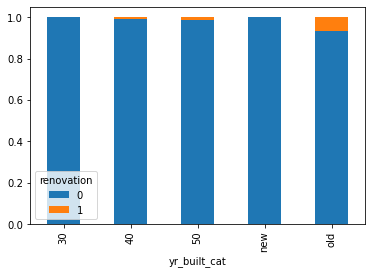

In [61]:
immo_pct = (immo.groupby(['yr_built_cat','renovation'])['price'].count()/immo.groupby(['yr_built_cat'])['price'].count())
immo_pct.unstack().plot.bar(stacked=True)

## Analysis of columns long, lat

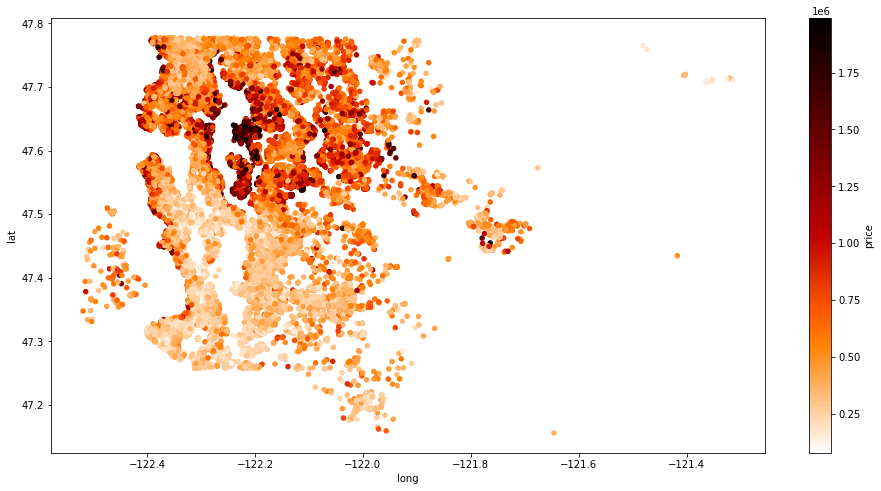

In [90]:
immo.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.show();

## Analysis of column zipcode

**Conclusions**
- `The zipcode column is a categorical one. If you use one-hot-encoding this would lead you to 70 additional 
features.`
- `I decide to replace the zipcode column by the avg value of the house sales considering the price_log.`

In [39]:
immo.zipcode.nunique()

70

In [42]:
immo['zipcode_avg']=immo['zipcode'].apply(lambda zipcode : immo.groupby('zipcode').mean().loc[zipcode]['price_log'])

In [43]:
immo.zipcode_avg.head()

0    12.559381
1    12.988734
2    12.999696
3    13.135646
4    13.372756
Name: zipcode_avg, dtype: float64

In [44]:
#immo = immo.drop(['zipcode'], axis=1)

## Analysis of date columns

**Conclusions**
- `Strong relationship between year and price. And also relationships between month and price and weekday and price. The last both are categorical features.`

Text(0.5, 1.0, 'Year vs. Price')

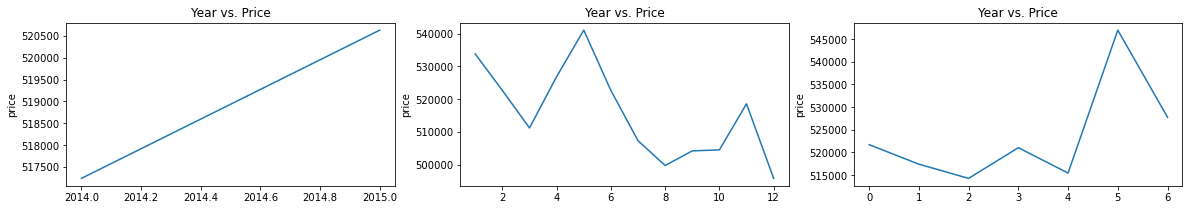

In [48]:
# Plot relationship of dateparts to price

plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.lineplot(x=immo['year'].unique(), y=immo.groupby('year').mean()['price']).set_title('Year vs. Price')
plt.subplot(1,3,2)
sns.lineplot(x=immo['month'].unique(), y=immo.groupby('month').mean()['price']).set_title('Year vs. Price')
plt.subplot(1,3,3)
sns.lineplot(x=immo['weekday'].unique(), y=immo.groupby('weekday').mean()['price']).set_title('Year vs. Price')


# feature engineering


## replacement by m2 for better understanding and interpretation

In [61]:
# replacement by m2 for better understanding and interpretation -> not used further on

immo["m2_living"]=immo["sqft_living"].apply(lambda x: x/10.764)
immo["m2_lot"]=immo["sqft_lot"].apply(lambda x: x/10.764)
immo["m2_basement"]=immo["sqft_basement"].apply(lambda x: x/10.764)

## replacement yr_built by yr_age

In [62]:
# replacement yr_built by yr_age
immo["yr_age"]=immo["yr_built"].apply(lambda x: 2020-x)

## time since renovation

In [63]:
# timeperiod passed since renovation
immo["yr_renovated"]=immo["yr_renovated"].apply(lambda x: 2020-x)

## flag for basement

In [64]:
# Einführung einer neuen Spalte Basement mit Ausprägungen 0/1
immo["basement"]=immo["sqft_basement"].apply(lambda x: 1 if x>0 else 0)

In [65]:
## Changing categorical features via dummies

In [66]:
# intoducing dummies
floors_dummy= pd.get_dummies(immo['floors'], prefix='fl', drop_first=True)
grade_dummy= pd.get_dummies(immo['grade'], prefix='gr', drop_first=True)
condition_dummy=pd.get_dummies(immo['condition'], prefix='c', drop_first=True)
view_dummy=pd.get_dummies(immo['view'], prefix='v', drop_first=True)
bedrooms_dummy=pd.get_dummies(immo['bedrooms'], prefix='bed', drop_first=True)
bathrooms_dummy=pd.get_dummies(immo['bathrooms'], prefix='bath', drop_first=True)
weekday_dummy=pd.get_dummies(immo['weekday'], prefix='day', drop_first=True)
month_dummy=pd.get_dummies(immo['month'], prefix='month', drop_first=True)


In [67]:
immo_dum = immo.drop(['id','price','grade','condition','floors','view','bedrooms','bathrooms','weekday','month','date'], axis=1)

In [68]:
immo_dum = pd.concat([immo_dum,grade_dummy,condition_dummy,bedrooms_dummy,bathrooms_dummy,floors_dummy,weekday_dummy,month_dummy], axis=1)

In [69]:
immo_dum.columns

Index(['sqft_living', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_livingneigh', 'sqft_lotneigh', 'year', 'm2_living', 'm2_lot',
       'm2_basement', 'yr_age', 'basement', 'price_log', 'zipcode_avg', 'gr_4',
       'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12',
       'gr_13', 'c_2', 'c_3', 'c_4', 'c_5', 'bed_2', 'bed_3', 'bed_4', 'bed_5',
       'bed_6', 'bath_0.75', 'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75',
       'bath_2.0', 'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0',
       'bath_3.25', 'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25',
       'bath_4.5', 'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5',
       'bath_5.75', 'bath_6.0', 'bath_6.5', 'fl_1.5', 'fl_2.0', 'fl_2.5',
       'fl_3.0', 'fl_3.5', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_

# Conclusions

In [37]:
immo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21334 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21334 non-null  int64         
 1   date              21334 non-null  datetime64[ns]
 2   price             21334 non-null  float64       
 3   bedrooms          21334 non-null  int64         
 4   bathrooms         21334 non-null  float64       
 5   sqft_living       21334 non-null  int64         
 6   sqft_lot          21334 non-null  int64         
 7   floors            21334 non-null  float64       
 8   waterfront        21334 non-null  float64       
 9   view              21334 non-null  float64       
 10  condition         21334 non-null  int64         
 11  grade             21334 non-null  int64         
 12  sqft_above        21334 non-null  int64         
 13  sqft_basement     21334 non-null  int64         
 14  yr_built          2133

<AxesSubplot:title={'center':'Correlation of variables'}>

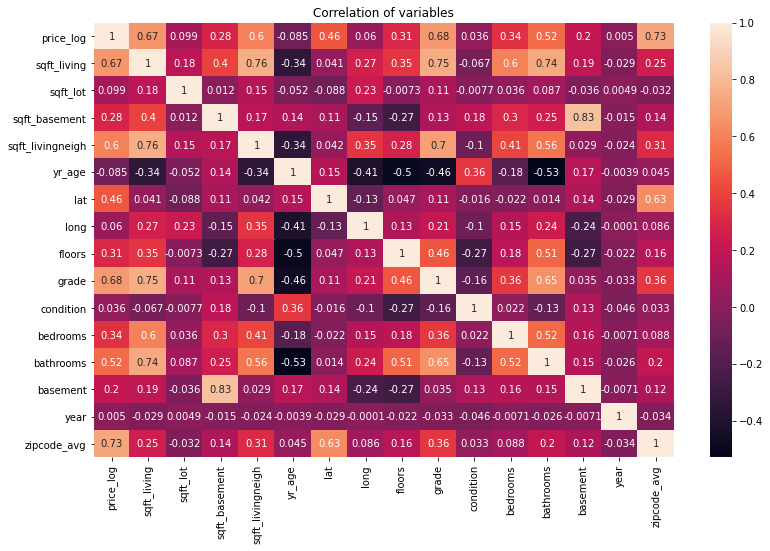

In [45]:
#correlation
corr = immo[['price_log','sqft_living','sqft_lot','sqft_basement','sqft_livingneigh','yr_age','lat','long','floors','grade','condition',
       'bedrooms','bathrooms','basement','year','zipcode_avg']]
plt.figure(figsize=(13,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)
#plt.show

# predictive modelling


## linear regression

### first try with one feature; the feature with the highest correlation is the feature avg_zipcode

In [231]:
# first shot with only one feature zipcode_avg, label: price_log
X = immo[['zipcode_avg']]        

y = immo.price_log

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [233]:
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_LinReg=cross_val_score(LinReg,X_train,y_train,cv=10)
cv_LinReg_pred=cross_val_predict(LinReg,X_train,y_train,cv=10)


Text(0.5, 1.0, 'CV-prediction with LinearRegression')

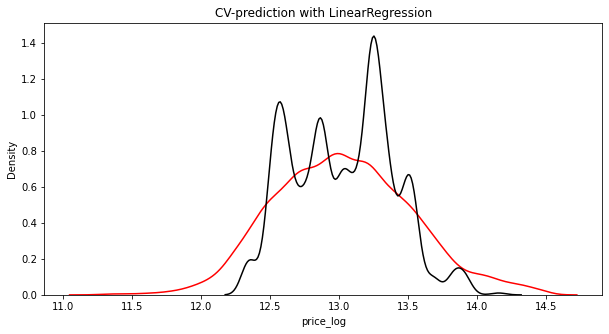

In [234]:
#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))  
ax=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_LinReg_pred,hist=False,label='Pred-CV-Value',color='black',ax=ax)
plt.title("CV-prediction with LinearRegression")

Text(0.5, 1.0, 'Prediction with test features in LinearRegression')

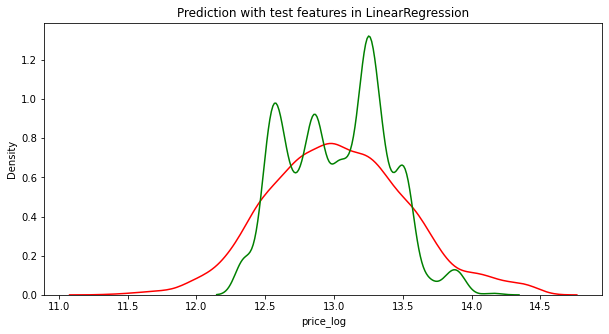

In [235]:
LinReg_pred=LinReg.predict(X_test)


#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Test data',color='r')
sns.distplot(LinReg_pred,hist=False,label='Pred-Value',color='g',ax=ax)
plt.title("Prediction with test features in LinearRegression")

In [236]:
df_results = pd.DataFrame( 
                  columns=['Model', 'feature_selection','score','score_pred'])


In [237]:
df_results=df_results.append({'Model' : 'Linear Regression' ,'feature_selection' : 'zipcode_avg', 'score' : r2_score(y_train,cv_LinReg_pred)
                   ,'score_pred' : r2_score(y_test,LinReg_pred)} , ignore_index=True)

### second try with the most important features

In [238]:
# additonal features
X = immo[['bathrooms','sqft_living','sqft_livingneigh','sqft_basement','lat','bedrooms','grade','zipcode_avg']]
y = immo.price_log

Text(0.5, 1.0, 'CV-prediction with LinearRegression')

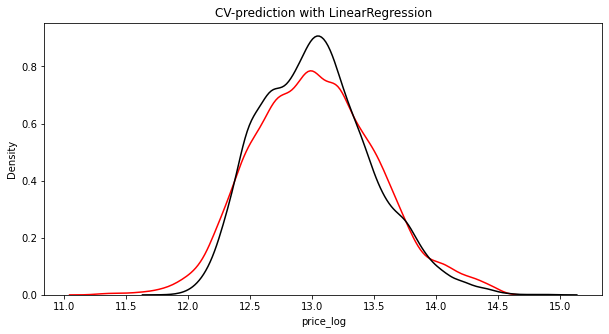

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

cv_LinReg=cross_val_score(LinReg,X_train,y_train,cv=10)
cv_LinReg_pred=cross_val_predict(LinReg,X_train,y_train,cv=10)


#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))  
ax=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_LinReg_pred,hist=False,label='Pred-CV-Value',color='black',ax=ax)
plt.title("CV-prediction with LinearRegression")

Text(0.5, 1.0, 'Prediction with test features in LinearRegression')

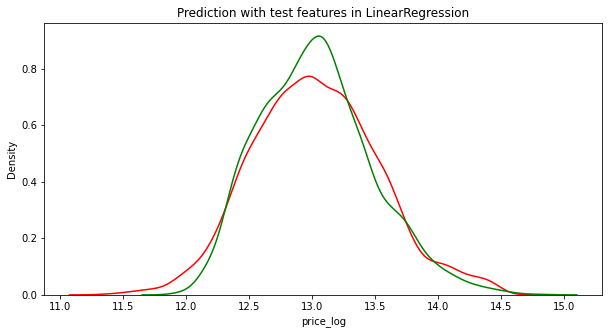

In [240]:
LinReg_pred=LinReg.predict(X_test)

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Test data',color='r')
sns.distplot(LinReg_pred,hist=False,label='Pred-Value',color='g',ax=ax)
plt.title("Prediction with test features in LinearRegression")

In [241]:
df_results=df_results.append({'Model' : 'Linear Regression_main' ,'feature_selection' : 'main', 'score' : r2_score(y_train,cv_LinReg_pred)
                   ,'score_pred' : r2_score(y_test,LinReg_pred)} , ignore_index=True)

In [242]:
df_results

,Model,feature_selection,score,score_pred
0,Linear Regression,zipcode_avg,0.533820,0.517835
1,Linear Regression_main,main,0.804461,0.801441


### considering all features


In [243]:
X = immo_dum[['sqft_living', 'sqft_lot', 'waterfront',  'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_livingneigh', 'sqft_lotneigh', 'yr_age', 'basement',
       'year', 'zipcode_avg', 'gr_4', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9',
       'gr_10', 'gr_11', 'gr_12', 'gr_13', 'c_2', 'c_3', 'c_4', 'c_5', 'bed_2',
       'bed_3', 'bed_4', 'bed_5', 'bed_6', 'bath_0.75', 'bath_1.0',
       'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0', 'bath_2.25',
       'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25', 'bath_3.5',
       'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5', 'bath_4.75',
       'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_5.75', 'bath_6.0',
       'bath_6.5', 'fl_1.5', 'fl_2.0', 'fl_2.5', 'fl_3.0', 'fl_3.5', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12']]
        
y = immo_dum.price_log

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [245]:
LinReg=LinearRegression()
LinReg.fit(X_train,y_train)

from sklearn.model_selection import  cross_val_score,cross_val_predict
cv_LinReg=cross_val_score(LinReg,X_train,y_train,cv=10)
cv_LinReg_pred=cross_val_predict(LinReg,X_train,y_train,cv=10)


Text(0.5, 1.0, 'CV-prediction with LinearRegression')

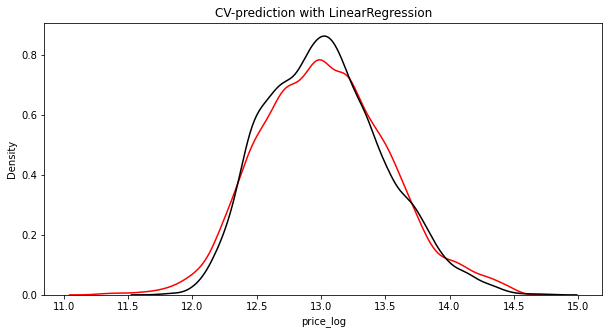

In [246]:
#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))  
ax=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_LinReg_pred,hist=False,label='Pred-CV-Value',color='black',ax=ax)
plt.title("CV-prediction with LinearRegression")

In [247]:
LinReg_pred=LinReg.predict(X_test)


Text(0.5, 1.0, 'Prediction with test features in LinearRegression')

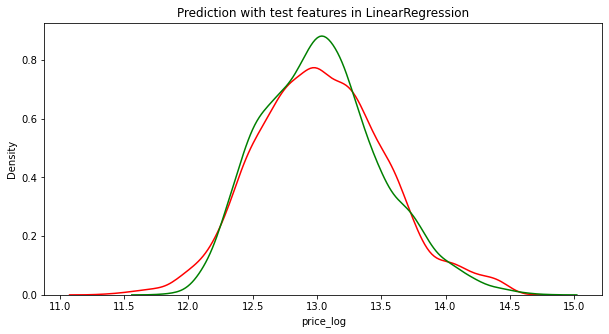

In [194]:
#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Test data',color='r')
sns.distplot(LinReg_pred,hist=False,label='Pred-Value',color='g',ax=ax)
plt.title("Prediction with test features in LinearRegression")

In [248]:
df_results=df_results.append({'Model' : 'Linear Regression_all' ,'feature_selection' : 'all', 'score' : r2_score(y_train,cv_LinReg_pred)
                   ,'score_pred' : r2_score(y_test,LinReg_pred)} , ignore_index=True)

In [249]:
df_results

,Model,feature_selection,score,score_pred
0,Linear Regression,zipcode_avg,0.533820,0.517835
1,Linear Regression_main,main,0.804461,0.801441
2,Linear Regression_all,all,0.846596,0.848263


## ridge regression

In [250]:
#Ridge
Rge=Ridge(alpha=0.1)
Rge.fit(X_train,y_train)


cv_Rge=cross_val_score(Rge,X_train,y_train,cv=10)
cv_Rge_pred=cross_val_predict(Rge,X_train,y_train,cv=10)


Text(0.5, 1.0, 'CV-prediction with Ridge')

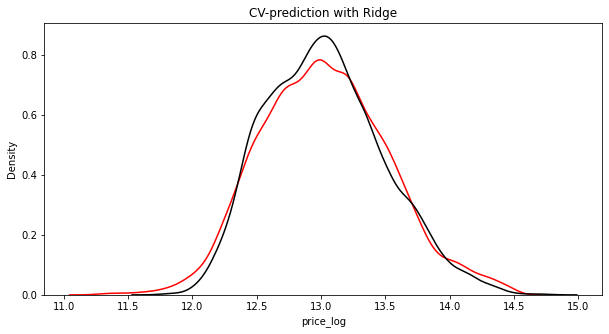

In [251]:
#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_Rge_pred,hist=False,label='Pred-CV-Value',color='black',ax=ax)
plt.title("CV-prediction with Ridge")

Text(0.5, 1.0, 'Prediction with test features in RidgeRegression')

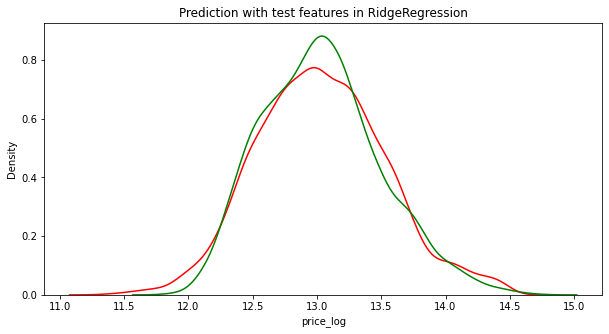

In [252]:
Rge_pred=Rge.predict(X_test)

#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Test data',color='r')
sns.distplot(Rge_pred,hist=False,label='Pred-Value',color='g',ax=ax)
plt.title("Prediction with test features in RidgeRegression")

In [253]:
df_results=df_results.append({'Model' : 'Ridge' ,'feature_selection' : 'all', 'score' : r2_score(y_train,cv_Rge_pred)
                   ,'score_pred' : r2_score(y_test,Rge_pred)} , ignore_index=True)

In [254]:
df_results

,Model,feature_selection,score,score_pred
0,Linear Regression,zipcode_avg,0.533820,0.517835
1,Linear Regression_main,main,0.804461,0.801441
2,Linear Regression_all,all,0.846596,0.848263
3,Ridge,all,0.846599,0.848138


## lasso regression

In [255]:
#Lasso

LSO=Lasso()
LSO.fit(X_train,y_train)


cv_LSO=cross_val_score(LSO,X_train,y_train,cv=10)
cv_LSO_pred=cross_val_predict(LSO,X_train,y_train,cv=10)


Text(0.5, 1.0, 'CV-prediction with Lasso')

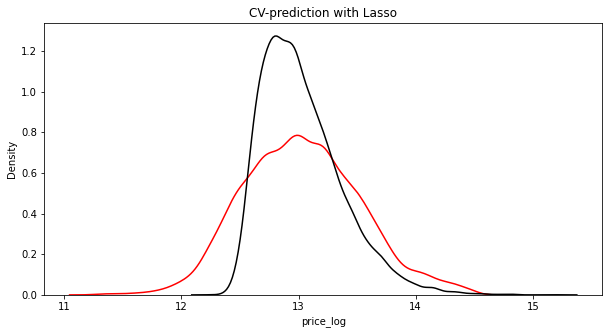

In [256]:
#Visualisation
fig,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_LSO_pred,hist=False,label='Pred-CV-Value',color='black',ax=ax)
plt.title("CV-prediction with Lasso")

In [257]:
LSO_pred=LSO.predict(X_test)


Text(0.5, 1.0, 'Prediction with test features in Lasso')

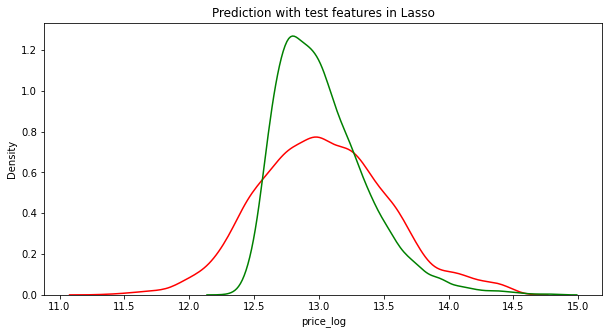

In [258]:
#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Test data',color='r')
sns.distplot(LSO_pred,hist=False,label='Pred-Value',color='g',ax=ax)
plt.title("Prediction with test features in Lasso")

In [259]:
df_results=df_results.append({'Model' : 'Lasso' ,'feature_selection' : 'all', 'score' : r2_score(y_train,cv_LSO_pred)
                   ,'score_pred' : r2_score(y_test,LSO_pred)} , ignore_index=True)

In [260]:
df_results

,Model,feature_selection,score,score_pred
0,Linear Regression,zipcode_avg,0.533820,0.517835
1,Linear Regression_main,main,0.804461,0.801441
2,Linear Regression_all,all,0.846596,0.848263
3,Ridge,all,0.846599,0.848138
4,Lasso,all,0.489148,0.497533


## Elastice Net

In [261]:
##ElasticNet

ELN=ElasticNet(random_state=42)
ELN.fit(X_train,y_train)

cv_ELN=cross_val_score(ELN,X_train,y_train,cv=10)
cv_ELN_pred=cross_val_predict(ELN,X_train,y_train,cv=10)

Text(0.5, 1.0, 'CV-prediction with ElasticNet')

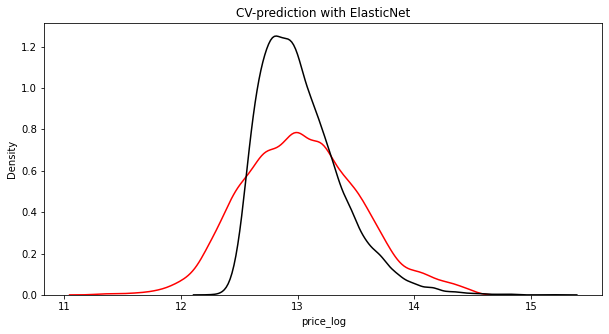

In [262]:
#Visalisation
fig,ax=plt.subplots(figsize=(10, 5))
  
ax=sns.distplot(y_train,hist=False,label='Y-Train',color='r')
sns.distplot(cv_ELN_pred,hist=False,label='Pred-CV-Value',color='black',ax=ax)
plt.title("CV-prediction with ElasticNet")

In [263]:
ELN_pred=ELN.predict(X_test)


Text(0.5, 1.0, 'Prediction with test features in ElasticNet')

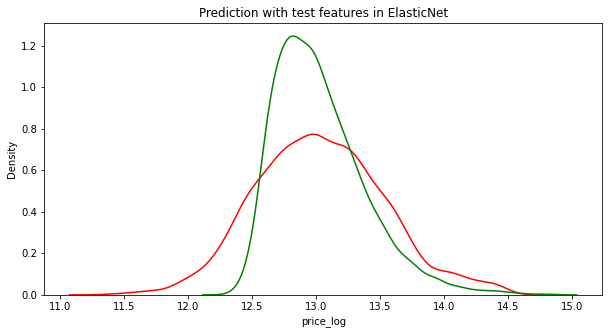

In [264]:
#Visualisation
f,ax=plt.subplots(figsize=(10, 5))
ax=sns.distplot(y_test,hist=False,label='Test data',color='r')
sns.distplot(ELN_pred,hist=False,label='Pred-Value',color='g',ax=ax)
plt.title("Prediction with test features in ElasticNet")

In [265]:
df_results=df_results.append({'Model' : 'ElasticNet' ,'feature_selection' : 'all', 'score' : r2_score(y_train,cv_ELN_pred)
                   ,'score_pred' : r2_score(y_test,ELN_pred)} , ignore_index=True)

# Overview results

**Conclusions**
- `The model which performs best is Linear Regression closely followed by Ridge Regression. Both have a r2_score of over 0.84.`
- `The linear regression model which only considers the highest correlated festures has a r2_score of over 0.8 whoch makes it to the next model in rank.`


In [266]:
df_results

,Model,feature_selection,score,score_pred
0,Linear Regression,zipcode_avg,0.533820,0.517835
1,Linear Regression_main,main,0.804461,0.801441
2,Linear Regression_all,all,0.846596,0.848263
3,Ridge,all,0.846599,0.848138
4,Lasso,all,0.489148,0.497533
5,ElasticNet,all,0.493742,0.501842


In [270]:
colors_2 = ['lightcoral',] * 7
colors_2[2] = 'crimson'

fig = go.Figure(data=[go.Bar(x=df_results.Model,
                             y=df_results.score_pred, marker_color=colors_2,
                             text=df_results.score_pred, name='R2_SCORE_TEST'
                            
             #color_discrete_sequence=px.colors.diverging.balance
            )])


fig.update_layout(title_text='Score for all models', title_x=0.01)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.95,
    xanchor="left",
    x=0.1
))
fig.update_layout(title=dict(
    yanchor="top",
    y=0.92,
    xanchor="left",
    x=0.13))
fig.update_layout( # customize font and legend orientation & position
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.3, xanchor="center"
    )
)
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,)
fig.show()